In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from icecream import ic

delicious_folder_path = 'delicious/'

user_user_df = pd.read_csv(delicious_folder_path + 'user_contacts-timestamps.dat', delimiter="\t")
user_item_df = pd.read_csv(delicious_folder_path + 'user_taggedbookmarks-timestamps.dat', delimiter="\t")

user_user_df = user_user_df.drop(columns=['timestamp'])

user_item_tags_df = user_item_df.copy()
user_item_df = user_item_df.drop(columns=['timestamp', 'tagID'])
user_item_df = user_item_df.drop_duplicates()


print(user_user_df.head())
print(user_item_df.head())

   userID  contactID
0       8      28371
1       8      40306
2       8      85279
3       8      91764
4       8      97723
   userID  bookmarkID
0       8           1
1       8           2
2       8           7
5       8           8
8       8           9


In [34]:
#Get number of distinct users and items

num_users = len(user_user_df['userID'].unique())
num_items = len(user_item_df['bookmarkID'].unique())
print("Number of users: ", num_users)
print("Number of items: ", num_items)

#Get number of distinct bookmarks (ie. unique (user, item) pairs)

num_ui_links = len(user_item_df[['userID', 'bookmarkID']].drop_duplicates())
print("Number of user-item links: ", num_ui_links)

#Get number of contacts (ie. unique (user, user) pairs)

num_uu_links = len(user_user_df[['userID', 'contactID']].drop_duplicates())
print("Number of user-user links: ", num_uu_links)

Number of users:  1861
Number of items:  69223
Number of user-item links:  104799
Number of user-user links:  15328


Density of user-user graph:  0.0044281892611788085
Average degree of user-user graph:  8.236432025792585
Max degree of user-user graph:  90  for user  1003


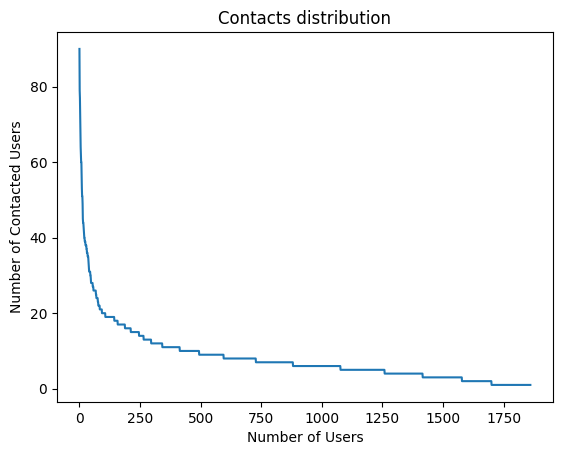

ic| np.sum(uu_degrees): 15328


Sparse degree of user-user graph:  8.236432025792585


In [35]:
#Metrics for user-user graph

#Density

uu_density = num_uu_links / (num_users * (num_users - 1))
print("Density of user-user graph: ", uu_density)

#Average degree

uu_avg_degree = num_uu_links / num_users
print("Average degree of user-user graph: ", uu_avg_degree)

#Distribution law

uu_degrees = user_user_df.groupby('userID').count()['contactID'].values
print("Max degree of user-user graph: ", max(uu_degrees), " for user ", np.argmax(uu_degrees))
uu_degrees = np.sort(uu_degrees)
uu_degrees = uu_degrees[::-1]

plt.plot(uu_degrees)
plt.title("Contacts distribution")
plt.xlabel("Number of Users")
plt.ylabel("Number of Contacted Users")
plt.show()

#Sparse degree

uu_sparse_degree = ic(np.sum(uu_degrees)) / num_users
print("Sparse degree of user-user graph: ", uu_sparse_degree)

Density of user-item graph:  0.0008135052285248426
Average degree of user-item graph:  56.313272434175175
Max degree of user-item graph:  95  for user  1010


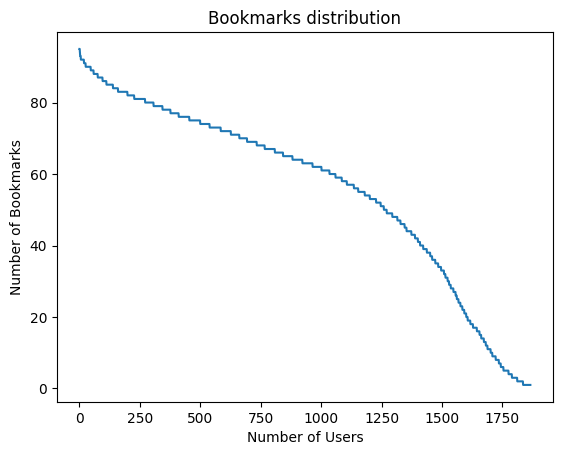

ic| np.sum(ui_degrees): 104799


Sparse degree of user-item graph:  56.313272434175175


In [36]:
#Metrics for user-item graph

#Density

ui_density = num_ui_links / (num_users * num_items)
print("Density of user-item graph: ", ui_density)

#Average degree

ui_avg_degree = num_ui_links / num_users
print("Average degree of user-item graph: ", ui_avg_degree)

#Distribution law

ui_degrees = user_item_df.groupby('userID').count()['bookmarkID'].values
print("Max degree of user-item graph: ", max(ui_degrees), " for user ", np.argmax(ui_degrees))
ui_degrees = np.sort(ui_degrees)
ui_degrees = ui_degrees[::-1]

plt.plot(ui_degrees)
plt.title("Bookmarks distribution")
plt.xlabel("Number of Users")
plt.ylabel("Number of Bookmarks")
plt.show()

#Sparse degree

ui_sparse_degree = ic(np.sum(ui_degrees)) / num_users
print("Sparse degree of user-item graph: ", ui_sparse_degree)